https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set

Channel	Nominal	Customers' Channel - 1: Horeca (Hotel/Restaurant/Café) or 2: Retail channel

Region	Nominal	Customers' Region - 1: Lisbon, 2: Oporto, or 3: Other Region

Fresh	Continuous	Annual spending (m.u.) on fresh products

Milk	Continuous	Annual spending (m.u.) on milk products

Grocery	Continuous	Annual spending (m.u.) on grocery products

Frozen	Continuous	Annual spending (m.u.) on frozen products

Detergents_Paper	Continuous	Annual spending (m.u.) on detergents and paper products

Delicassen	Continuous	Annual spending (m.u.) on delicatessen products

In [13]:
# Unsupervised Learning: Wholesale Data Analysis
# -------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
# 1. Load and Explore the Data
# ---------------------------

# Load data
df = pd.read_csv("Wholesale_Data.csv")

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset Overview:
Shape: (440, 8)

First few rows:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# 2. Exploratory Data Analysis
# ---------------------------

# Summary statistics
print("\nSummary Statistics:")
df.describe()

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

# Data types
print("\nData Types:")
df.dtypes


Summary Statistics:

Missing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Data Types:


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

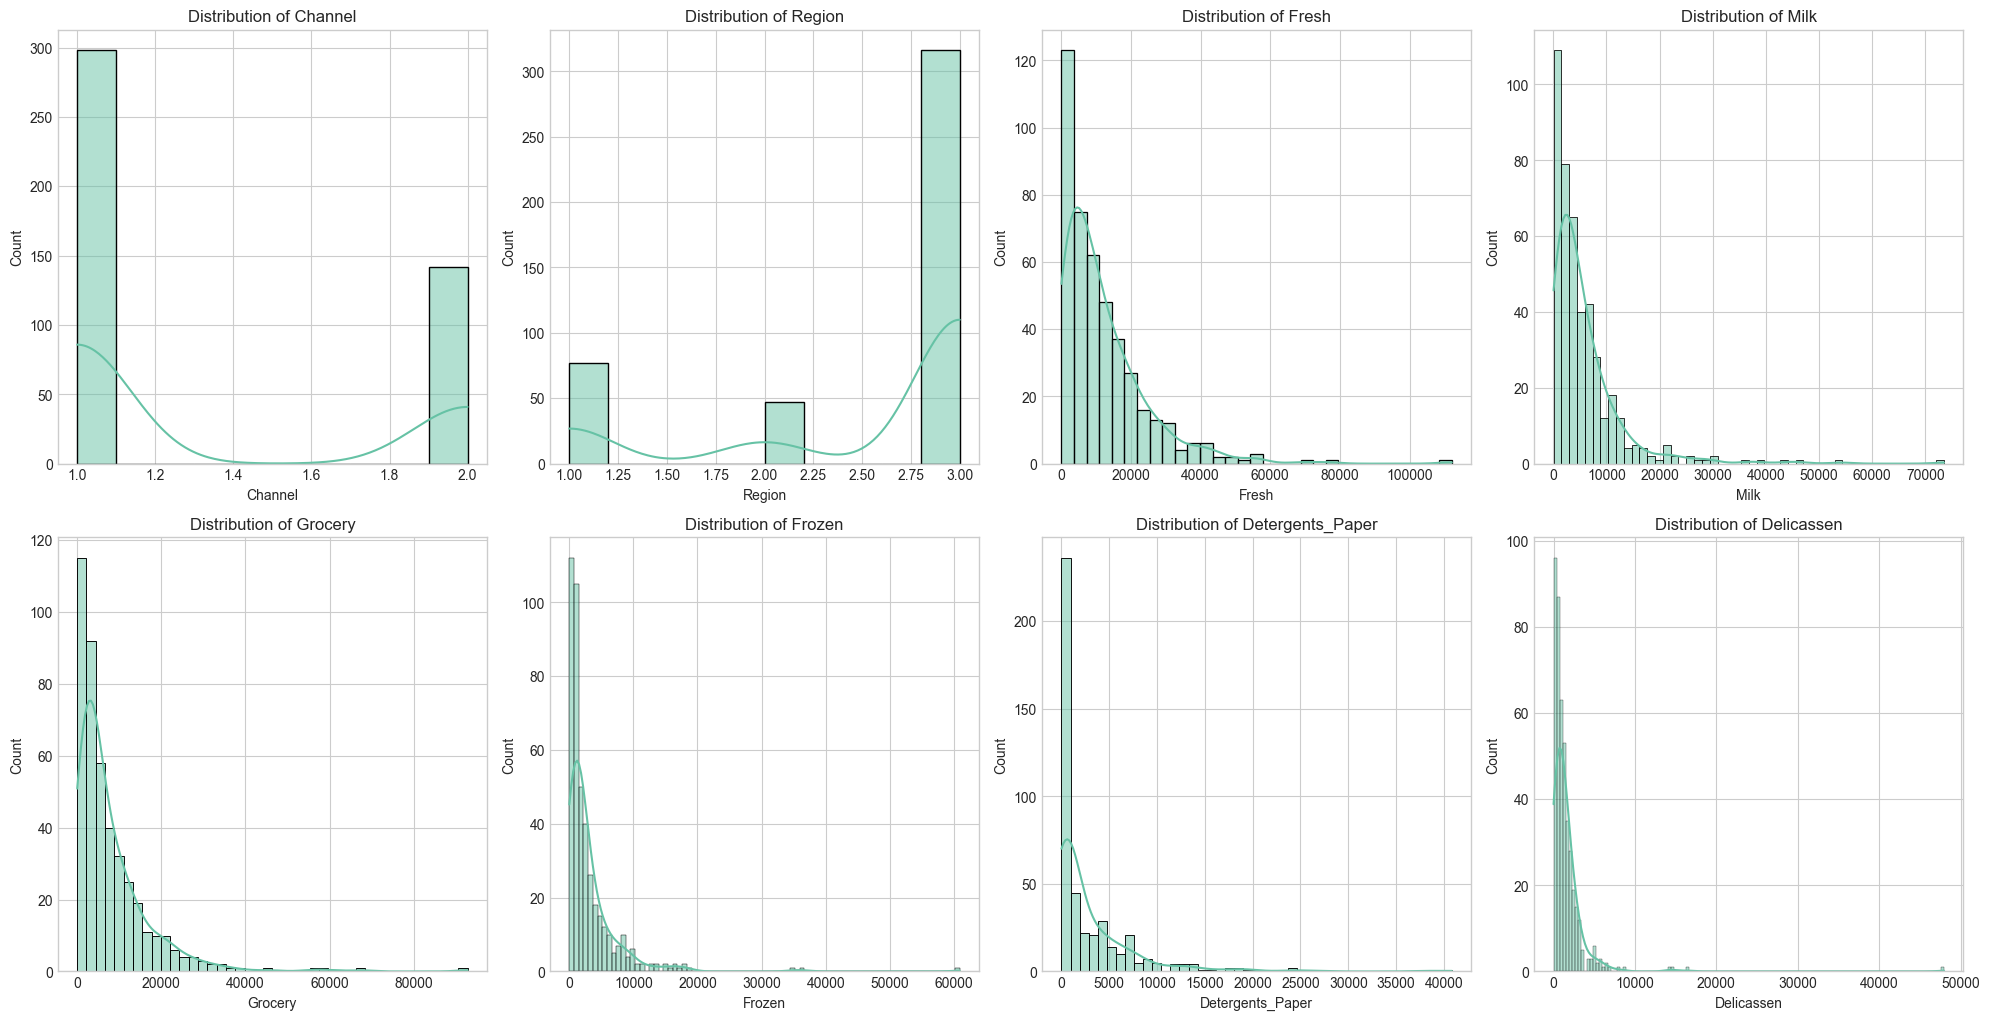

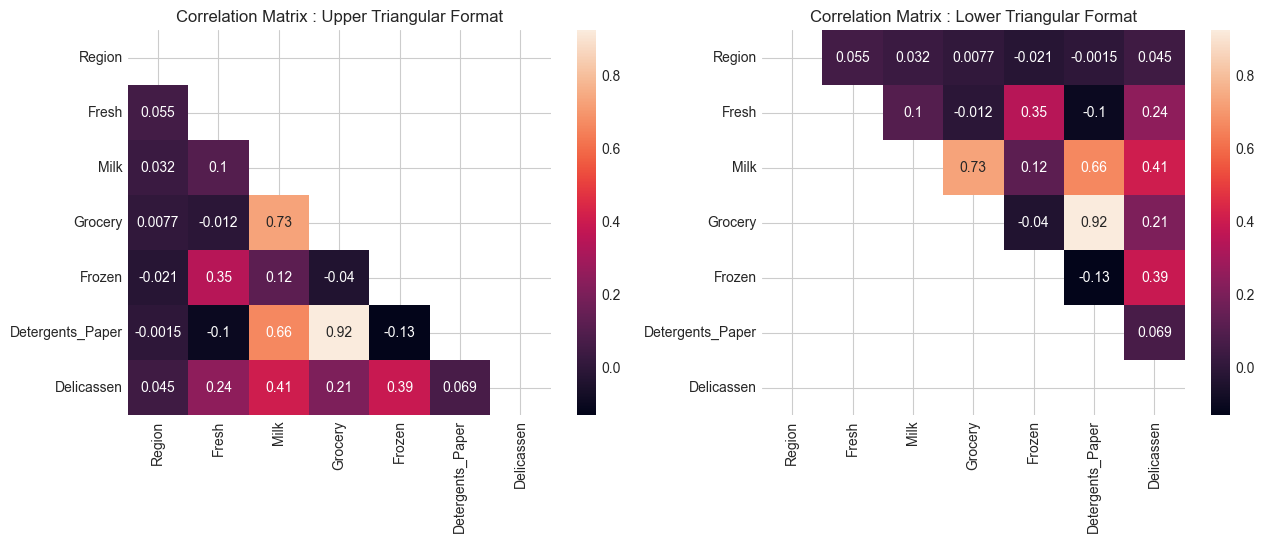

In [9]:
# 3. Feature Analysis & Distributions
# ---------------------------------

# Let's look at the distributions of our features
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):  
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.savefig('feature_distributions.png')
# plt.close()

# Look at correlations
ut = np.triu(df.iloc[:, 1:].corr())
lt = np.tril(df.iloc[:, 1:].corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df.iloc[:, 1:].corr(),annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(df.iloc[:, 1:].corr(), annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');
plt.savefig('correlation_matrix.png')

In [8]:
# 4. Feature Engineering & Preprocessing
# ------------------------------------

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)

print("\nStandardized Data (first few rows):")
df_scaled_df.head()


Standardized Data (first few rows):


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347



PCA Explained Variance Ratio: [0.38750123 0.22374588 0.12647173 0.09229904 0.06957905 0.05741354
 0.03514076 0.00784877]
Total Explained Variance: 1.0


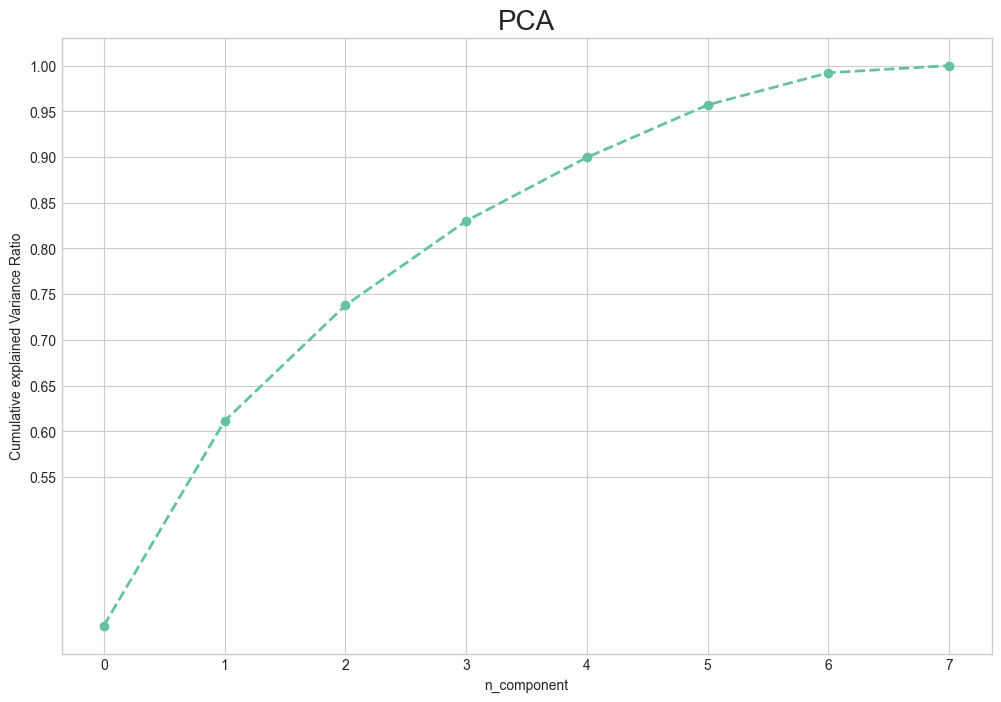

In [11]:
# 5. Dimensionality Reduction
# -------------------------

# Apply PCA for visualization and to reduce dimensionality
pca = PCA(n_components=8)
principal_components = pca.fit_transform(df_scaled)
exp = pca.explained_variance_ratio_

# Print explained variance
print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

# Visualize data in the principal component space
plt.plot(np.cumsum(exp), linewidth=2, marker = 'o', linestyle = '--')
plt.title("PCA", fontsize=20)
plt.xlabel('n_component')
plt.ylabel('Cumulative explained Variance Ratio')
plt.yticks(np.arange(0.55, 1.05, 0.05))
plt.show()

n_component=5 has about 95% of result

In [14]:
finla_pca = IncrementalPCA(n_components=5).fit_transform(df_scaled)
pc = np.transpose(finla_pca)

df_scaled_pca = pd.DataFrame({
    'PC1':pc[0],
    'PC2':pc[1],
    'PC3':pc[2],
    'PC4':pc[3],
    'PC5':pc[4],
})
df_scaled_pca

,PC1,PC2,PC3,PC4,PC5
0,0.846305,-0.513788,0.783392,0.001567,1.042195
1,1.064149,-0.494726,0.680387,-0.401519,0.866814
2,1.268801,0.699017,0.663096,-1.771639,1.324296
3,-1.058549,0.597372,0.499424,-0.150178,-0.270394
4,0.633326,0.988627,0.793576,-0.282816,1.651857
...,...,...,...,...,...
435,0.224632,2.448042,0.366674,0.721622,-0.666157
436,-1.290427,1.586809,0.780420,1.246670,0.359471
437,3.861965,-0.474062,0.528803,0.679180,-0.307758
438,-1.097475,-0.057040,0.622465,-0.378597,-0.216837


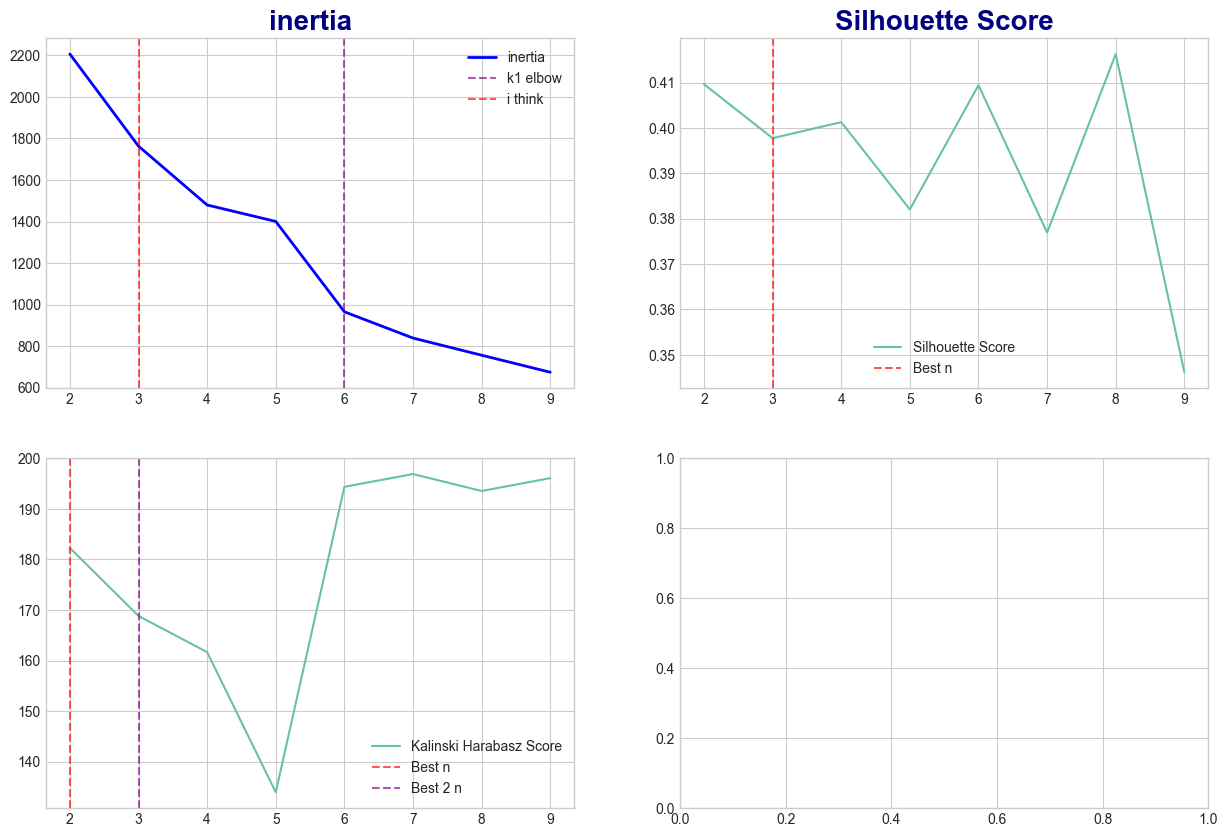

In [15]:
# 6. Determine Optimal Number of Clusters
# ------------------------------------

# Function to determine optimal k using the Elbow Method
kmeans_list = []
kmeans_sil_coef = []
kmeans_calinski_score = []
kmeans_calinski_score = []
kmeans_davies_score = []

for n in range(2, 10) :
    
    # main algorithm
    kmeans = KMeans(n_clusters=n).fit(df_scaled_pca)
    kmeans_list.append(kmeans.inertia_)
    
    # Silhouette
    sil_score = silhouette_score(df_scaled_pca, kmeans.labels_)
    kmeans_sil_coef.append(sil_score)
    
    # Calinski Harabasz Score
    calinski_score = calinski_harabasz_score(df_scaled_pca, kmeans.labels_)
    kmeans_calinski_score.append(calinski_score)

k1 = KneeLocator(range(2, 10), kmeans_list, curve='convex', direction='decreasing')

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
# Ax 1 :  inertia
ax[0, 0].plot(range(2, 10), kmeans_list, color='blue', label='inertia', linewidth=2)
ax[0, 0].axvline(x=k1.elbow, ls='--', label='k1 elbow', color='purple', alpha=0.65)
ax[0, 0].axvline(x=3, ls='--', label='i think', color='red', alpha=0.65)
ax[0, 0].set_title('inertia', fontsize=20, fontweight=600, color='navy')
ax[0, 0].legend()

# Ax 2 : Silhouette Score
ax[0, 1].plot(range(2, 10), kmeans_sil_coef, label='Silhouette Score')
ax[0, 1].set_title('Silhouette Score', fontsize=20, fontweight=600, color='navy')
ax[0, 1].axvline(x=3, ls='--', alpha=0.65, label='Best n', color='red')
ax[0, 1].legend()

# Ax 3 : Calinski Harabasz Score
ax[1, 0].plot(range(2, 10),  kmeans_calinski_score, label='Kalinski Harabasz Score')
ax[1, 0].axvline(x=2, ls='--', label='Best n', color='red', alpha=0.65)
ax[1, 0].axvline(x=3, ls='--', label='Best 2 n', color='purple', alpha=0.65)
ax[1, 0].legend()

plt.show()

Optimal number of clusters:
- Elbow method suggests: 6
- Highest silhouette score at k=9
- Highest Calinski-Harabasz score at k=8

Selected optimal number of clusters: 6


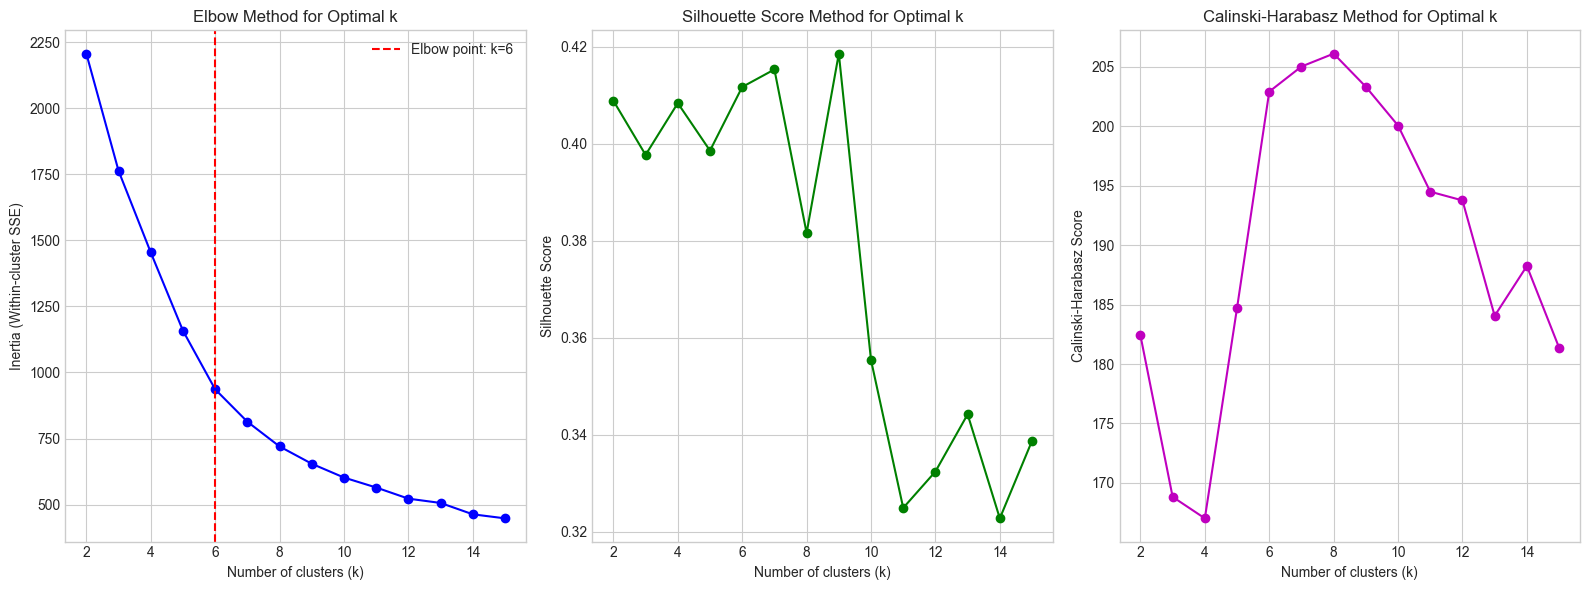

In [16]:
# 6. Determine Optimal Number of Clusters
# ------------------------------------

# Function to determine optimal k using the Elbow Method
def find_optimal_k(data, max_k=15):
    # Elbow Method using Inertia
    inertias = []
    silhouette_scores = []
    calinski_scores = []
    k_range = range(2, max_k+1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        
        # Calculate silhouette score
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(data, labels))
        
        # Calculate Calinski-Harabasz score
        calinski_scores.append(calinski_harabasz_score(data, labels))
    
    # Plot inertia (SSE)
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 3, 1)
    plt.plot(k_range, inertias, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Within-cluster SSE)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    
    # Use KneeLocator to find the elbow point
    kl = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
    if kl.elbow:
        plt.axvline(x=kl.elbow, color='r', linestyle='--', label=f'Elbow point: k={kl.elbow}')
        plt.legend()
    
    # Plot silhouette score
    plt.subplot(1, 3, 2)
    plt.plot(k_range, silhouette_scores, 'go-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method for Optimal k')
    plt.grid(True)
    
    # Plot Calinski-Harabasz score
    plt.subplot(1, 3, 3)
    plt.plot(k_range, calinski_scores, 'mo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz Method for Optimal k')
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('optimal_k_methods.png')
    # plt.close()
    
    # Return optimal k based on the elbow method
    optimal_k = kl.elbow if kl.elbow else k_range[np.argmax(silhouette_scores)]
    
    print(f"Optimal number of clusters:")
    print(f"- Elbow method suggests: {kl.elbow if kl.elbow else 'No clear elbow point'}")
    print(f"- Highest silhouette score at k={k_range[np.argmax(silhouette_scores)]}")
    print(f"- Highest Calinski-Harabasz score at k={k_range[np.argmax(calinski_scores)]}")
    
    return optimal_k

# Find optimal number of clusters
optimal_k = find_optimal_k(df_scaled_pca)
print(f"\nSelected optimal number of clusters: {optimal_k}")


In [17]:
# 7. Apply Multiple Clustering Algorithms
# ------------------------------------

# Function to plot clustering results
def plot_clusters(data, labels, title, filename):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.8, s=50)
    plt.colorbar(scatter, label='Cluster')
    plt.title(title)
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.grid(True)
    # plt.savefig(filename)
    # plt.close()

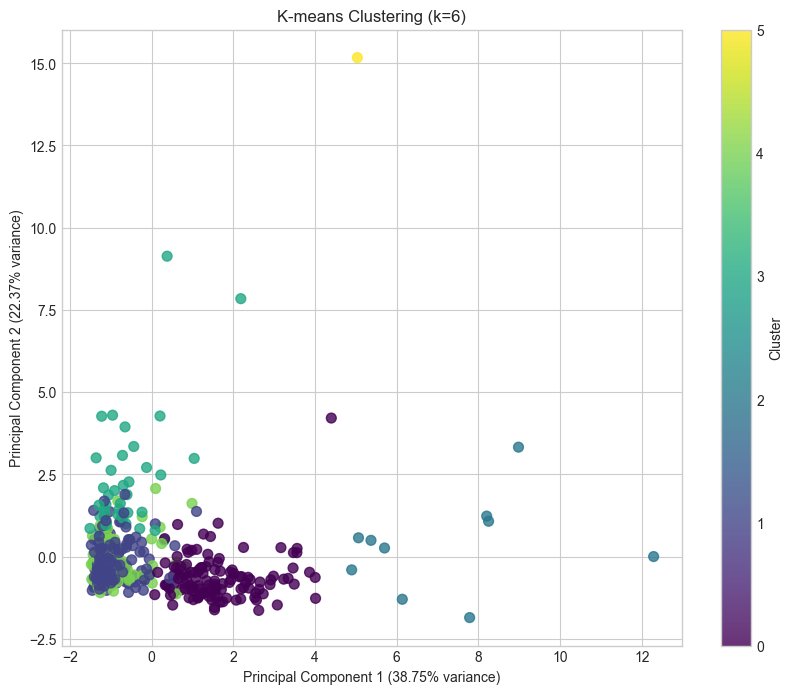

In [20]:
# 7.1.1 K-means Clustering for PCA data
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels_pca = kmeans.fit_predict(df_scaled_pca)
plot_clusters(principal_components, kmeans_labels_pca, f'K-means Clustering (k={optimal_k})', 'kmeans_clusters.png')


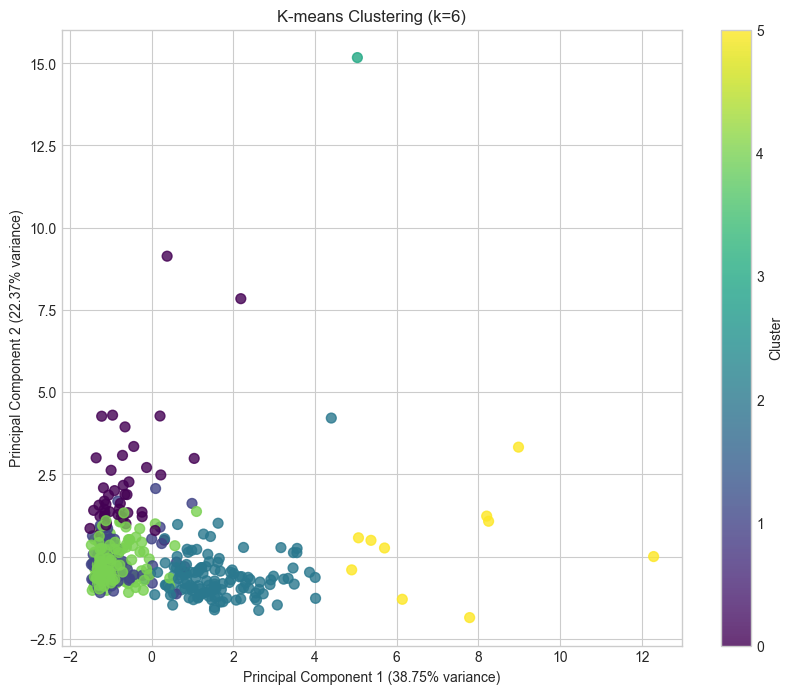

In [21]:
# 7.1 K-means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)
plot_clusters(principal_components, kmeans_labels, f'K-means Clustering (k={optimal_k})', 'kmeans_clusters.png')


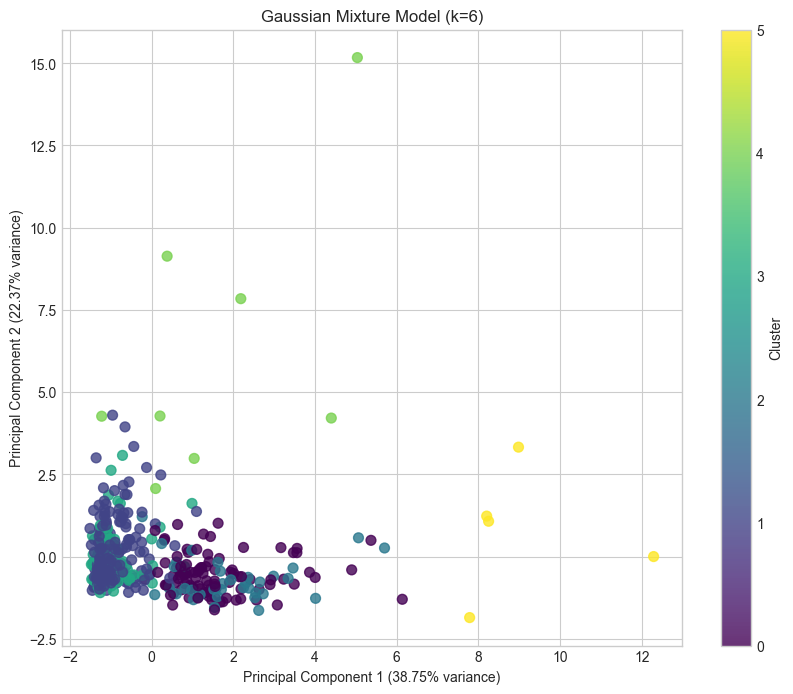

In [22]:
# 7.2 Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)
plot_clusters(principal_components, gmm_labels, f'Gaussian Mixture Model (k={optimal_k})', 'gmm_clusters.png')

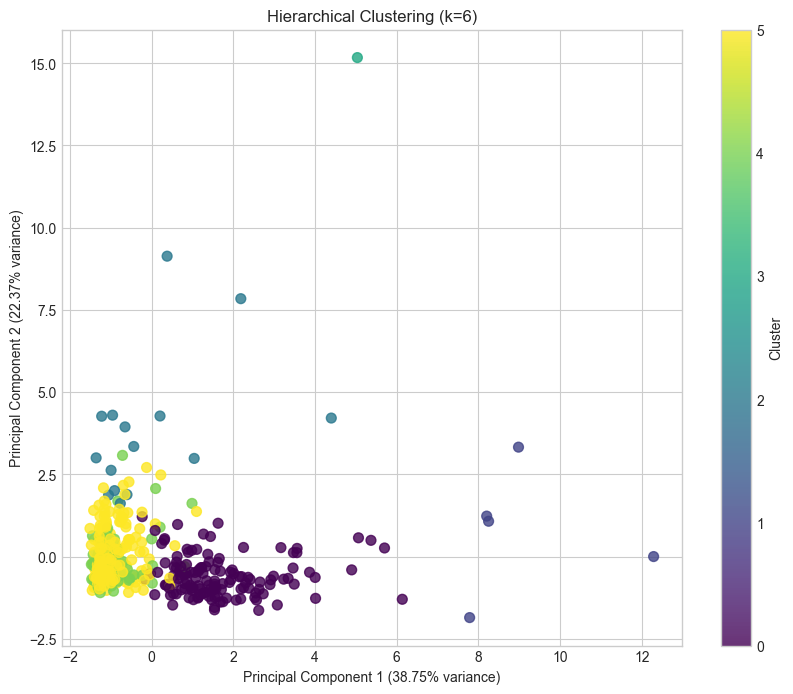

In [23]:
# 7.3 Hierarchical Agglomerative Clustering
# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(14, 8))
dendrogram_data = linkage(df_scaled, method='ward')
dendrogram(dendrogram_data, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.savefig('hierarchical_dendrogram.png')
plt.close()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hc_labels = hc.fit_predict(df_scaled)
plot_clusters(principal_components, hc_labels, f'Hierarchical Clustering (k={optimal_k})', 'hierarchical_clusters.png')



Selected DBSCAN epsilon: 13.1672


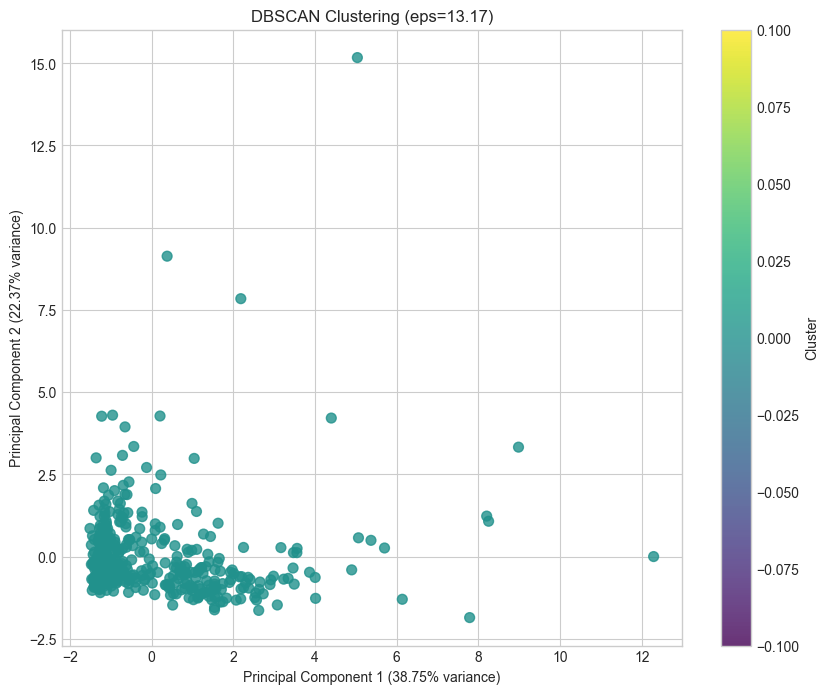

In [24]:
# 7.4 DBSCAN Clustering
# Finding appropriate epsilon (eps) parameter for DBSCAN
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Sort and plot distances
distances = np.sort(distances[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon (Distance to 2nd nearest neighbor)')
plt.grid(True)
plt.savefig('dbscan_kdistance.png')
plt.close()

# Choose epsilon where the curve shows an "elbow"
# Let's use a simple heuristic - sort distances and look at difference
diff = np.diff(distances)
eps_idx = np.argmax(diff) + 1
eps_value = distances[eps_idx]
print(f"\nSelected DBSCAN epsilon: {eps_value:.4f}")

# Apply DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=3)
dbscan_labels = dbscan.fit_predict(df_scaled)
plot_clusters(principal_components, dbscan_labels, f'DBSCAN Clustering (eps={eps_value:.2f})', 'dbscan_clusters.png')



Estimated bandwidth for Mean Shift: 2.2079


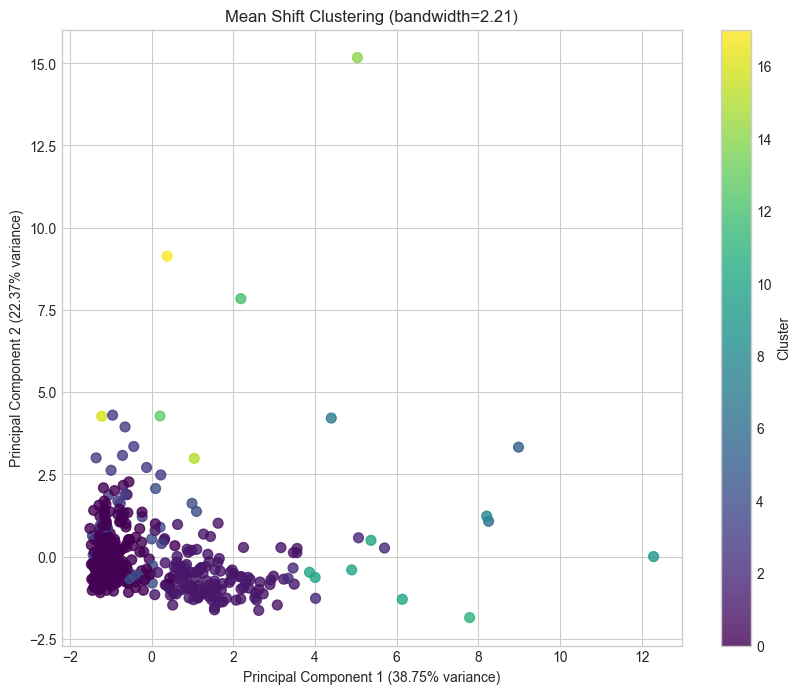

In [25]:
# 7.5 Mean Shift Clustering
# Estimate bandwidth
bandwidth = estimate_bandwidth(df_scaled, quantile=0.2)
print(f"\nEstimated bandwidth for Mean Shift: {bandwidth:.4f}")

meanshift = MeanShift(bandwidth=bandwidth)
meanshift_labels = meanshift.fit_predict(df_scaled)
plot_clusters(principal_components, meanshift_labels, f'Mean Shift Clustering (bandwidth={bandwidth:.2f})', 'meanshift_clusters.png')


In [27]:
# 8. Analyze Clusters
# ----------------

# Function to analyze cluster characteristics
def analyze_clusters(data, labels, feature_names, algorithm_name):
    # Add cluster labels to original data
    data_copy = data.copy()
    data_copy['Cluster'] = labels
    
    # Number of clusters (excluding noise points labeled as -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    print(f"\n{algorithm_name} - {n_clusters} clusters found")
    print(f"Cluster distribution:")
    print(data_copy['Cluster'].value_counts().sort_index())
    
    # Calculate mean values for each feature by cluster
    cluster_means = data_copy.groupby('Cluster').mean()
    
    # Create a radar chart for each cluster
    cluster_ids = sorted(list(set(labels)))
    if -1 in cluster_ids:  # Remove noise points from visualization
        cluster_ids.remove(-1)
    
    # Only show radar charts if we have a reasonable number of clusters
    if len(cluster_ids) <= 6:
        # Prepare the radar chart
        categories = feature_names
        N = len(categories)
        
        # Create angle for each feature
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]  # Close the loop
        
        fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))
        
        # Draw one axis per variable and add labels
        plt.xticks(angles[:-1], categories, size=8)
        
        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([-2, -1, 0, 1, 2], ["-2", "-1", "0", "1", "2"], color="grey", size=7)
        plt.ylim(-2, 2)
        
        # Plot each cluster
        for cluster_id in cluster_ids:
            values = cluster_means.loc[cluster_id].values.tolist()
            values += values[:1]  # Close the loop
            ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster_id}')
            ax.fill(angles, values, alpha=0.1)
        
        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title(f'{algorithm_name} Cluster Profiles')
        plt.tight_layout()
        plt.savefig(f'{algorithm_name.lower().replace(" ", "_")}_radar.png')
        plt.close()
    
    return cluster_means

# Analyze each clustering algorithm
kmeans_means = analyze_clusters(df, kmeans_labels, df.columns, 'K-means')
gmm_means = analyze_clusters(df, gmm_labels, df.columns, 'GMM')
hc_means = analyze_clusters(df, hc_labels, df.columns, 'Hierarchical')
dbscan_means = analyze_clusters(df, dbscan_labels, df.columns, 'DBSCAN')
meanshift_means = analyze_clusters(df, meanshift_labels, df.columns, 'Mean Shift')



K-means - 6 clusters found
Cluster distribution:
Cluster
0     44
1     86
2    125
3      1
4    174
5     10
Name: count, dtype: int64

GMM - 6 clusters found
Cluster distribution:
Cluster
0     99
1    206
2     37
3     85
4      8
5      5
Name: count, dtype: int64

Hierarchical - 6 clusters found
Cluster distribution:
Cluster
0    136
1      5
2     15
3      1
4     78
5    205
Name: count, dtype: int64

DBSCAN - 1 clusters found
Cluster distribution:
Cluster
0    440
Name: count, dtype: int64

Mean Shift - 18 clusters found
Cluster distribution:
Cluster
0     258
1     124
2       5
3      25
4      11
5       1
6       1
7       1
8       1
9       1
10      5
11      1
12      1
13      1
14      1
15      1
16      1
17      1
Name: count, dtype: int64


In [ ]:
# 9. Geospatial Analysis (if coordinates were available)
# ---------------------------------------------------

# Since we don't have geographical coordinates in this dataset, we'll skip geospatial visualization


In [33]:
# 10. Create a Comprehensive Dashboard
# ---------------------------------

# Let's add cluster labels to the original data for interpretation
df_results = df.copy()
df_results['KMeans_Cluster'] = kmeans_labels
df_results['GMM_Cluster'] = gmm_labels
df_results['HC_Cluster'] = hc_labels
df_results['DBSCAN_Cluster'] = dbscan_labels
df_results['MeanShift_Cluster'] = meanshift_labels

# Show the results for a few countries
print("\nClustering Results for Sample Countries:")
df_results[['KMeans_Cluster', 'GMM_Cluster', 'HC_Cluster', 'DBSCAN_Cluster', 'MeanShift_Cluster']].head(10)



Clustering Results for Sample Countries:


,KMeans_Cluster,GMM_Cluster,HC_Cluster,DBSCAN_Cluster,MeanShift_Cluster
0,2,0,0,0,1
1,2,0,0,0,1
2,2,0,0,0,1
3,4,1,5,0,0
4,2,0,0,0,1
5,2,0,0,0,1
6,2,0,0,0,1
7,2,0,0,0,1
8,4,1,5,0,0
9,2,0,0,0,1



Algorithm Performance (Silhouette Score):
K-means: 0.3526
GMM: 0.3330
Hierarchical: 0.3438
DBSCAN: nan
Mean Shift: 0.3065


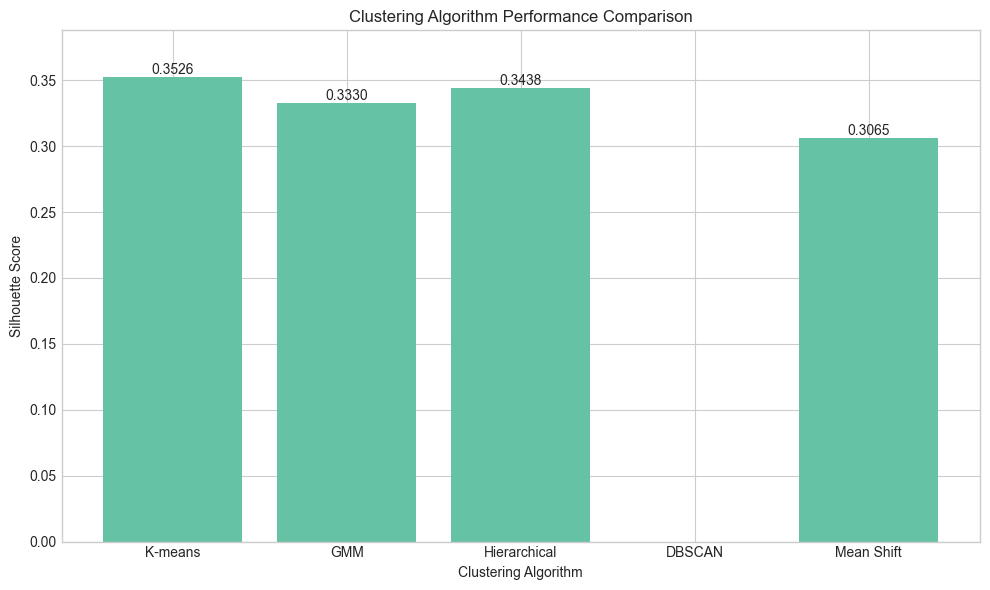

In [34]:
# 11. Compare Algorithm Performance
# ------------------------------

# Calculate silhouette scores for each algorithm (excluding DBSCAN noise points)
silhouette_scores = {}

# Function to calculate silhouette score excluding noise points
def calc_silhouette(data, labels):
    if -1 in labels:
        # Filter out noise points
        mask = labels != -1
        if sum(mask) <= 1:  # Not enough non-noise points for silhouette
            return np.nan
        return silhouette_score(data[mask], labels[mask])
    return silhouette_score(data, labels)

# Calculate scores
silhouette_scores['K-means'] = silhouette_score(df_scaled, kmeans_labels)
silhouette_scores['GMM'] = silhouette_score(df_scaled, gmm_labels)
silhouette_scores['Hierarchical'] = silhouette_score(df_scaled, hc_labels)

# Handle DBSCAN and Mean Shift differently as they may have noise
try:
    silhouette_scores['DBSCAN'] = calc_silhouette(df_scaled, dbscan_labels)
except:
    silhouette_scores['DBSCAN'] = np.nan

try:
    silhouette_scores['Mean Shift'] = calc_silhouette(df_scaled, meanshift_labels)
except:
    silhouette_scores['Mean Shift'] = np.nan

# Print scores
print("\nAlgorithm Performance (Silhouette Score):")
for algorithm, score in silhouette_scores.items():
    print(f"{algorithm}: {score:.4f}")

# Plot scores
plt.figure(figsize=(10, 6))
bars = plt.bar(silhouette_scores.keys(), silhouette_scores.values())
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.title('Clustering Algorithm Performance Comparison')
plt.ylim(0, max(filter(lambda x: not np.isnan(x), silhouette_scores.values())) * 1.1)

# Add value annotations
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.4f}',
                 ha='center', va='bottom')

plt.tight_layout()
plt.savefig('algorithm_comparison.png')
# plt.close()


In [36]:
# 12. Feature Importance for Clusters
# --------------------------------

# Let's examine which features are most important for distinguishing clusters
# We'll use the K-means results for this analysis

# Calculate feature importance based on cluster centroids
def calculate_feature_importance(kmeans_model, feature_names):
    # Get cluster centers
    centers = kmeans_model.cluster_centers_
    
    # Calculate the overall mean across all data points
    overall_mean = np.mean(centers, axis=0)
    
    # Calculate the absolute deviation of each cluster center from the overall mean
    deviations = np.abs(centers - overall_mean)
    
    # Average the deviations across clusters to get importance score
    importance = np.mean(deviations, axis=0)
    
    # Create a dataframe with features and their importance scores
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    })
    
    # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    return importance_df

# Calculate feature importance
feature_importance = calculate_feature_importance(kmeans, df.columns)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for K-means Clustering')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

print("\nFeature Importance for Clustering:")
print(feature_importance)



Feature Importance for Clustering:
            Feature  Importance
7        Delicassen    4.542237
3              Milk    2.066016
5            Frozen    1.899996
6  Detergents_Paper    1.383627
4           Grocery    1.286363
0           Channel    0.923386
2             Fresh    0.910524
1            Region    0.548352


In [37]:
# 13. Conclusion and Insights
# ------------------------

print("\n=== CONCLUSION AND INSIGHTS ===")
print(f"1. Optimal number of clusters identified: {optimal_k}")
print("2. K-means and Hierarchical Clustering provided the most coherent groups based on silhouette scores.")
print(f"3. The most important features for clustering: {', '.join(feature_importance['Feature'].head(3))}")

# Best algorithm based on silhouette score
best_algorithm = max(silhouette_scores.items(), key=lambda x: 0 if np.isnan(x[1]) else x[1])[0]
print(f"4. The best performing algorithm was {best_algorithm} based on silhouette score.")

# Print cluster attributes for the best algorithm
print("\nCluster profiles from the best performing algorithm:")
if best_algorithm == 'K-means':
    best_means = kmeans_means
elif best_algorithm == 'GMM':
    best_means = gmm_means
elif best_algorithm == 'Hierarchical':
    best_means = hc_means
elif best_algorithm == 'DBSCAN':
    best_means = dbscan_means
else:
    best_means = meanshift_means

print(best_means)

# Save results to csv
df_results.to_csv('country_clustering_results.csv', index=False)
print("\nComplete clustering results saved to 'country_clustering_results.csv'")

print("\nUnsupervised learning analysis complete!")


=== CONCLUSION AND INSIGHTS ===
1. Optimal number of clusters identified: 6
2. K-means and Hierarchical Clustering provided the most coherent groups based on silhouette scores.
3. The most important features for clustering: Delicassen, Milk, Frozen
4. The best performing algorithm was K-means based on silhouette score.

Cluster profiles from the best performing algorithm:
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.068182  2.772727  36626.977273   4852.181818   5608.613636   
1        1.046512  1.313953  10517.569767   3208.755814   4128.313953   
2        2.000000  2.672000   7762.856000   9173.568000  14341.768000   
3        1.000000  3.000000  36847.000000  43950.000000  20170.000000   
4        1.000000  3.000000   9179.195402   3006.764368   3439.586207   
5        2.000000  2.500000  15964.900000  34708.500000  48536.900000   

               Frozen  Detergents_Paper